In [47]:
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

%matplotlib inline

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X, y)

In [12]:
print(confusion_matrix(y, model.predict(X)))

[[47  2]
 [ 3 48]]


In [14]:
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        49
          1       0.96      0.94      0.95        51

avg / total       0.95      0.95      0.95       100



In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

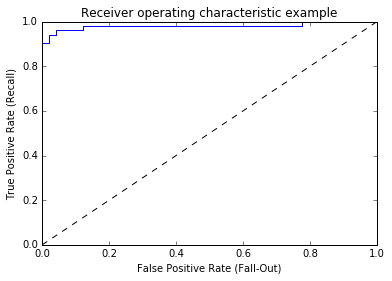

In [16]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [26]:
fpr

array([ 0.        ,  0.        ,  0.02040816,  0.02040816,  0.04081633,
        0.04081633,  0.12244898,  0.12244898,  0.7755102 ,  0.7755102 ,  1.        ])

In [33]:
dfv = model.decision_function(X)

In [48]:
dfv2 = np.sort(dfv)

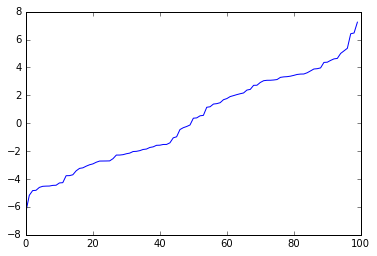

In [40]:
plt.plot(dfv2)

In [50]:
idx = (dfv2<0 ).sum()

In [52]:
dfv2[idx-1], dfv2[idx]

(-0.12815748448981312, 0.35807011034117164)

In [53]:
thresholds


array([ 7.24206317,  1.14148507,  0.56194883,  0.38045956,  0.35807011,
       -0.12815748, -0.97494752, -1.04809826, -3.76360833, -4.2628357 ,
       -6.33200169])

In [54]:
ids = np.sum(thresholds > 0)

In [57]:
tpr[ids-1], tpr[ids]

(0.94117647058823528, 0.96078431372549022)

In [60]:
fpr[ids-1], tpr[ids]

(0.040816326530612242, 0.96078431372549022)

In [61]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X,y)

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

In [79]:
idx = (thresholds > 0).sum()
tpr0 = tpr[idx-1 : idx+1].mean()
fpr0 = fpr[idx-1 : idx+1].mean()

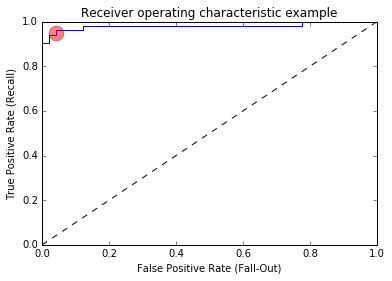

In [82]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot(fpr0, tpr0, 'ro', ms=15, alpha=0.5)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [64]:
plt.plot

In [83]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
model = LogisticRegression().fit(iris.data, iris.target)

In [84]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds0 = roc_curve(iris.target, model.decision_function(iris.data)[:,0], pos_label=0)
fpr1, tpr1, thresholds1 = roc_curve(iris.target, model.decision_function(iris.data)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(iris.target, model.decision_function(iris.data)[:,2], pos_label=2)

In [100]:
idx0 = (thresholds0 > 0).sum()
idx1 = (thresholds1 > 0).sum()
idx2 = (thresholds2 > 0).sum()
fpr00 = fpr0[idx0-1:idx0+1 ].mean()
tpr00 = tpr0[idx0-1:idx0+1].mean()
fpr11 = fpr1[idx1-1:idx1+1 ].mean()
tpr11 = tpr1[idx1-1:idx1+1].mean()
fpr22 = fpr2[idx2-1:idx2+1 ].mean()
tpr22 = tpr2[idx2-1:idx2+1].mean()

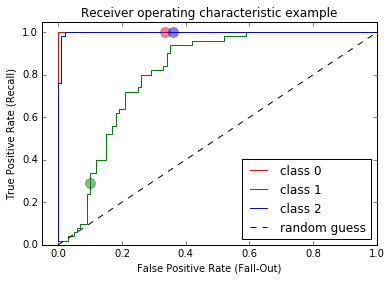

In [101]:
plt.plot(fpr0, tpr0, "r-", label="class 0 ")
plt.plot(fpr1, tpr1, "g-", label="class 1")
plt.plot(fpr2, tpr2, "b-", label="class 2")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot(fpr00, tpr00, "ro", ms=10, alpha=0.5)
plt.plot(fpr11, tpr11, "go", ms=10, alpha=0.5)
plt.plot(fpr22, tpr22, "bo", ms=10, alpha=0.5)
plt.xlim(-0.05, 1.0)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()